In [19]:
import pymc as pm
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [10]:
df = pd.read_csv("../data/train.csv")
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


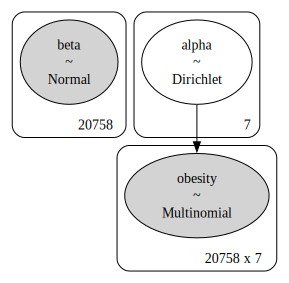

In [33]:
X = df["Age"]
y = df["NObeyesdad"]
n_classes = len(y.unique())

encoder = OneHotEncoder()
encoded_y = encoder.fit_transform(y.to_numpy().reshape(-1, 1))

np.dot(X.to_numpy().reshape(-1, 1), np.ones(n_classes).reshape(1, -1))

with pm.Model() as model:
    beta = pm.Normal("beta", mu=0, sigma=1, observed=X)
    frac = pm.Dirichlet("alpha", a=np.ones(n_classes))
    obesity = pm.Multinomial("obesity", n=1, p=frac, observed=encoded_y)

pm.model_to_graphviz(model)

In [18]:
encoded_y

array([6, 1, 0, ..., 3, 6, 3])